In [12]:
import json
import urllib 
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [15]:
params = {}
url='https://aqs.epa.gov/data/api/list/parametersByClass?email=samavedamanjali@gmail.com&key=russetcrane95&pc=CRITERIA'
with urllib.request.urlopen(url) as urlhandle:
    params = json.loads(urlhandle.read().decode())
params

{'Header': [{'status': 'Success',
   'request_time': '2020-02-02T13:14:54-05:00',
   'url': 'https://aqs.epa.gov/data/api/list/parametersByClass?email=samavedamanjali@gmail.com&key=russetcrane95&pc=CRITERIA',
   'rows': 8}],
 'Data': [{'code': '14129', 'value_represented': 'Lead (TSP) LC'},
  {'code': '42101', 'value_represented': 'Carbon monoxide'},
  {'code': '42401', 'value_represented': 'Sulfur dioxide'},
  {'code': '42602', 'value_represented': 'Nitrogen dioxide (NO2)'},
  {'code': '44201', 'value_represented': 'Ozone'},
  {'code': '81102', 'value_represented': 'PM10 Total 0-10um STP'},
  {'code': '85129', 'value_represented': 'Lead PM10 LC FRM/FEM'},
  {'code': '88101', 'value_represented': 'PM2.5 - Local Conditions'}]}

In [11]:
for i in params['Data']:
    print(i['code'])

{'code': '14129', 'value_represented': 'Lead (TSP) LC'}
{'code': '42101', 'value_represented': 'Carbon monoxide'}
{'code': '42401', 'value_represented': 'Sulfur dioxide'}
{'code': '42602', 'value_represented': 'Nitrogen dioxide (NO2)'}
{'code': '44201', 'value_represented': 'Ozone'}
{'code': '81102', 'value_represented': 'PM10 Total 0-10um STP'}
{'code': '85129', 'value_represented': 'Lead PM10 LC FRM/FEM'}
{'code': '88101', 'value_represented': 'PM2.5 - Local Conditions'}


In [99]:
params_dict = {}

# i represents one hash map at a time
for i in params['Data']:
    #print (i['code'], i['value_represented'])
    params_dict[i['code']] = i['value_represented']
del params_dict['14129']  # Some issue with data for this; ignore for now
print (params_dict)


{'42101': 'Carbon monoxide', '42401': 'Sulfur dioxide', '42602': 'Nitrogen dioxide (NO2)', '44201': 'Ozone', '81102': 'PM10 Total 0-10um STP', '85129': 'Lead PM10 LC FRM/FEM', '88101': 'PM2.5 - Local Conditions'}


In [100]:
# PM2.5
def get_param_data(p,y):
    url='https://aqs.epa.gov/data/api/dailyData/byCounty?email=samavedamanjali@gmail.com&key=russetcrane95&param=' + p + '&bdate=' + y + '0101&edate=' + y + '1231&state=24&county=005'
    #print(url)
    with urllib.request.urlopen(url) as urlhandle:
        data = json.loads(urlhandle.read().decode())
        #print(json.dumps(data))
    df = pd.DataFrame.from_dict(data['Data'])
    return df
    #dfc.groupby('date_local').mean().plot(figsize=(15,5))


In [107]:
data_all = {}
for k in params_dict.keys() :
    print('Processing ', k, params_dict[k])
    data_all[k] = get_param_data(k,'2014')

Processing  42101 Carbon monoxide
Processing  42401 Sulfur dioxide
Processing  42602 Nitrogen dioxide (NO2)
Processing  44201 Ozone
Processing  81102 PM10 Total 0-10um STP
Processing  85129 Lead PM10 LC FRM/FEM
Processing  88101 PM2.5 - Local Conditions


In [108]:
for p in data_all.keys():
    print(p, data_all[p].size )

42101 22134
42401 55831
42602 22630
44201 70587
81102 0
85129 0
88101 35092


In [67]:
for p in data_all.keys():
    print(p)
    df = data_all[p][['date_local','arithmetic_mean']][0:4]
    print(df.empty)

42101
False
42401
False
42602
False
44201
False
81102
False
85129


KeyError: "None of [Index(['date_local', 'arithmetic_mean'], dtype='object')] are in the [columns]"

KeyError: "None of [Index(['date_local', 'arithmetic_mean'], dtype='object')] are in the [columns]"

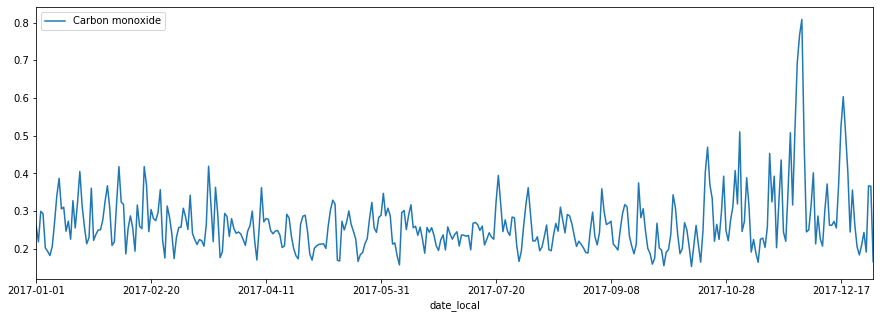

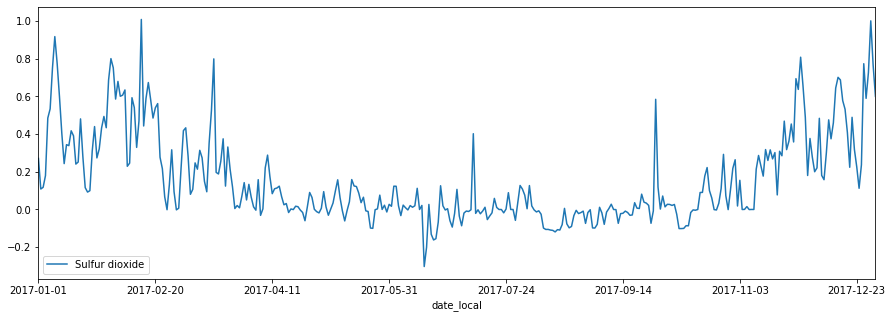

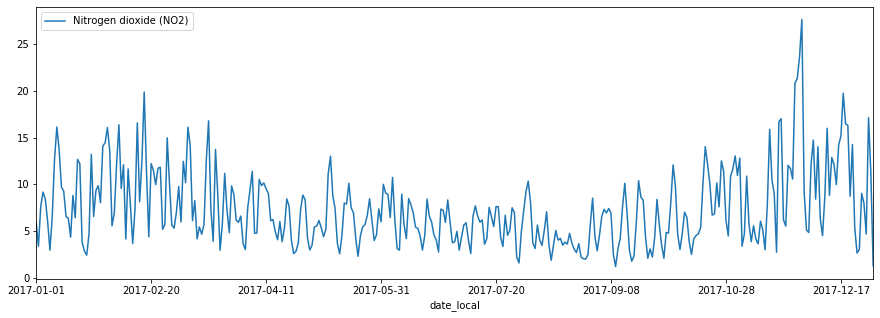

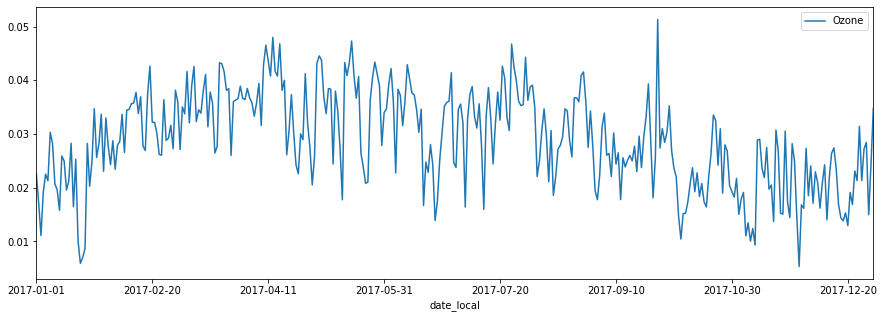

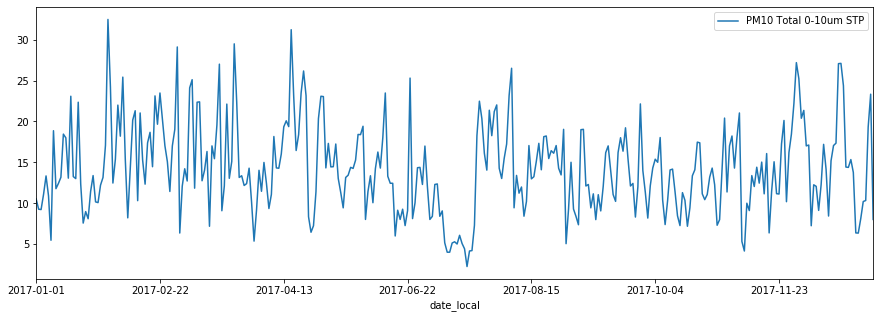

In [55]:
for p in data_all.keys():
    #print(p)
    df = data_all[p][['date_local','arithmetic_mean']]
    #print(['date_local',params_dict[p]])
    df.columns = ['date_local',params_dict[p]]
    
    df.groupby('date_local').mean().plot(figsize=(15,5))


In [3]:
for i in range(3,10,3):
    print(i*2)

6
12
18
